<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/SC/LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [70]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [71]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
I041

181

In [72]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [73]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [74]:
al_tweets[0].text

'Well well well... look what just showed up on my doorstep! http://twitpic.com/59mi2c'

In [75]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:

from __future__ import print_function

import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [77]:

# max_features = 20000
# # cut texts after this number of words (among top max_features most common words)
# maxlen = 80
batch_size = 32


def load_tweet_dat(seq_length=80): 
    
    rp = np.random.permutation(austen_tweets + al_tweets)
    tweet = [t.text for t in rp]
    name = [t.user for t in rp]
    
    seqs = [[ord(c) for c in x] for x in [t.text for t in rp]]
    
    aust = sequence.pad_sequences(np.array([[ord(c) for c in t.text] for t in austen_tweets]), maxlen=80)
    weal = sequence.pad_sequences(np.array([[ord(c) for c in t.text] for t in al_tweets]), maxlen=80)

    aust_df = pd.DataFrame(aust).assign(by_user=[t.user for t in austen_tweets])
    weal_df = pd.DataFrame(weal).assign(by_user=[t.user for t in al_tweets]).drop(0, axis=0)

    df = pd.concat([aust_df, weal_df]).sample(frac=1).reset_index(drop=True)
    return train_test_split(df.drop(['by_user'], axis=1), df.by_user.map({'alyankovic': 1, 'austen': 0}).fillna(0), test_size=0.5)

X_train, X_test, y_train, y_test = load_tweet_dat()

print(X_train.shape, X_test.shape, X_test.shape, y_test.shape)


(570, 80) (570, 80) (570, 80) (570,)


In [78]:
print('Build model...')
model = Sequential()
model.add(Embedding(570, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Build model...
Train...
Instructions for updating:
Use tf.cast instead.


W0412 16:54:13.629298 139871653967744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 570 samples, validate on 570 samples
Epoch 1/15
570/570 [==============================] - 20s 35ms/step - loss: 0.5200 - acc: 0.8474 - val_loss: 0.4188 - val_acc: 0.8333
Epoch 2/15
570/570 [==============================] - 4s 6ms/step - loss: 0.3364 - acc: 0.8737 - val_loss: 0.3874 - val_acc: 0.8544
Epoch 3/15
570/570 [==============================] - 3s 6ms/step - loss: 0.2939 - acc: 0.9018 - val_loss: 0.3442 - val_acc: 0.8754
Epoch 4/15
570/570 [==============================] - 3s 6ms/step - loss: 0.2689 - acc: 0.9105 - val_loss: 0.3331 - val_acc: 0.8754
Epoch 5/15
570/570 [==============================] - 3s 6ms/step - loss: 0.2527 - acc: 0.9158 - val_loss: 0.3246 - val_acc: 0.8807
Epoch 6/15
570/570 [==============================] - 3s 6ms/step - loss: 0.2417 - acc: 0.9246 - val_loss: 0.3463 - val_acc: 0.8719
Epoch 7/15
570/570 [==============================] - 3s 6ms/step - loss: 0.2457 - acc: 0.9105 - val_loss: 0.2879 - val_acc: 0.9088
Epoch 8/15
570/570 [========

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [1]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 19.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://www.nwf.org/-/media/NEW-WEBSITE/Programs/Garden-for-Wildlife/amphibian_bronze-frog_Julia-Bartosh_400x267.ashx
Completed Image ====> 5. amphibian_bronze-frog_julia-bartosh_400x267.ash

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.


*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [95]:
# import tensorflow as tf
# import tensorflow_hub as hub

# with tf.Graph().as_default():
#   module_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1"
#   embed = hub.Module(module_url)
#   embeddings = embed(["A long sentence.", "single-word",
#                       "http://example.com"])

#   with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     sess.run(tf.tables_initializer())

#     print(sess.run(embeddings))

from keras import applications
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf

import tensorflow_hub as hub
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.optimizers import SGD, Adam


# imheight = 267
# imwidth = 400
# num_classes = 2 # frog or not frog
# base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (imheight, imwidth, 3))


# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.7)(x)
# predictions = Dense(num_classes, activation= 'softmax')(x)
# model = Model(inputs = base_model.input, outputs = predictions)

# # sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# adam = Adam(lr=0.0001)
# model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])


# base_model

# absolute_image_paths['animal pond']

# for k in range(30):
#   im = Image.open(absolute_image_paths['animal pond'][k])

#   print(np.asarray(im).shape)


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [114]:

pics = [Image.open(pic) for pic in absolute_image_paths['animal pond']]

def predict(i: int) -> bool: 
  frogs = ['bullfrog', 'tree frog', 'tailed frog']
  pic_ = pics[i]
  
  num_classes=1001
  
  module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
  height, width = hub.get_expected_image_size(module)
  
  pic = pic_.resize((height, width))
  
  data = tf.constant(np.asarray(pic) / 255, tf.float32)
  #data = np.asarray(pic) / 255
  images = tf.stack(data)
  
  logits = module(images)  # Logits with shape [batch_size, num_classes].

  return logits

# predict(0)
# predict(1)
# predict(2)
# predict(3)
predict(4)


#tf.stack([tf.constant(np.asarray(p)/255, tf.float32) for p in pics])

TypeError: ignored

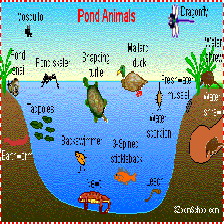

In [92]:
pics[0].resize((224,224))

In [52]:
[k for k in dir(pics[0]) if '_' not in k]



['category',
 'close',
 'convert',
 'copy',
 'crop',
 'data',
 'decoderconfig',
 'decodermaxblock',
 'dispose',
 'draft',
 'filename',
 'filter',
 'format',
 'fp',
 'frombytes',
 'fromstring',
 'getbands',
 'getbbox',
 'getcolors',
 'getdata',
 'getextrema',
 'getim',
 'getpalette',
 'getpixel',
 'getprojection',
 'height',
 'histogram',
 'im',
 'info',
 'load',
 'mode',
 'offset',
 'palette',
 'paste',
 'point',
 'putalpha',
 'putdata',
 'putpalette',
 'putpixel',
 'pyaccess',
 'quantize',
 'readonly',
 'resize',
 'rotate',
 'save',
 'seek',
 'show',
 'size',
 'split',
 'tell',
 'thumbnail',
 'tile',
 'tobitmap',
 'tobytes',
 'toqimage',
 'toqpixmap',
 'tostring',
 'transform',
 'transpose',
 'verify',
 'width']

In [31]:
import tensorflow_hub as hub

# module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
# height, width = hub.get_expected_image_size(module)
# images = ...  # A batch of images with shape [batch_size, height, width, 3].
# logits = module(images)  # Logits with shape [batch_size, num_classes].

[k.shape for k in [np.asarray(Image.open(absolute_image_paths['animal pond'][k])) for k in range(5)]
]

[(210, 431), (360, 480, 3), (520, 570, 4), (2048, 3072, 3), (267, 400, 3)]

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [32]:
!pip install tpot

    100% |████████████████████████████████| 81kB 3.2MB/s 
    100% |████████████████████████████████| 942kB 20.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built stopit deap


In [33]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 16:37:15--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.09s   

2019-04-12 16:37:15 (26.8 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [34]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [111]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('kc_house_data.csv')

print(df.shape)
assert df.isna().sum().sum() == 0

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df.price,
                                                    train_size=0.75, test_size=0.25)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

tpot = TPOTRegressor(generations=5, population_size=100, verbosity=2, config_dict='TPOT light')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_kc_pipeline.py')



(21613, 21)
(16209, 20) (16209,) (5404, 20) (5404,)


RuntimeError: ignored

In [0]:
!python tpot_kc_pipeline.py

## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

# What do I consider my strongest area, as a data scientist? 

I very naturally go back to each of the math aspects of my tooling from first principles, but this is a gift and a curse. 

I also think my general software accuity, including functional programming, is an advantage 

# What area of data science would I most like to learn more about? 

data compression and information theory, functional models of deep learning like [this](https://colah.github.io/posts/2015-09-NN-Types-FP/). 

I need to grind up linear discriminant analysis. 

I wanna do more lazy feature engineering (i.e. with spark or dask) to leverage structured streaming 

# Where do I think data science will be in 5 years? 

I think wrangling data and the problem of completely painful data dumps will still be here. Definitely more cloud and less local execution, and this will go along with more inference over hyperparameters being potentially hidden from the data engineers in black boxes.